In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter
from scipy.ndimage import convolve1d
import utils
import torch
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot




In [2]:
cols = ["fix_acidity", "vol_acidity", "critic_acidity", "res_sugar", "chloride", "free_SO2", "tot_SO2", "density", "pH","sulphate", "alcohol", "class"] # Quality is class

df = pd.read_csv("winequality-red.csv", names = cols, delimiter=";", header=0)


#df = df.loc[:, ['fix_acidity', 'vol_acidity', 'critic_acidity', 'alcohol','class']]
df

,fix_acidity,vol_acidity,critic_acidity,res_sugar,chloride,free_SO2,tot_SO2,density,pH,sulphate,alcohol,class
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
#change data type to value
data = df.values

In [5]:
#separating the X, y. They are the class and atributes and should be separated for the rest of the calculations.
X, y = data[:, :-1], data[:, -1]
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
#we do necessary changes for the oversampling method SMOTE, since data is imbalanced.
y = LabelEncoder().fit_transform(y)

In [7]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [8]:
counter = Counter(y)


Class=2, n=681 (16.667%)
Class=3, n=681 (16.667%)
Class=4, n=681 (16.667%)
Class=1, n=681 (16.667%)
Class=5, n=681 (16.667%)
Class=0, n=681 (16.667%)


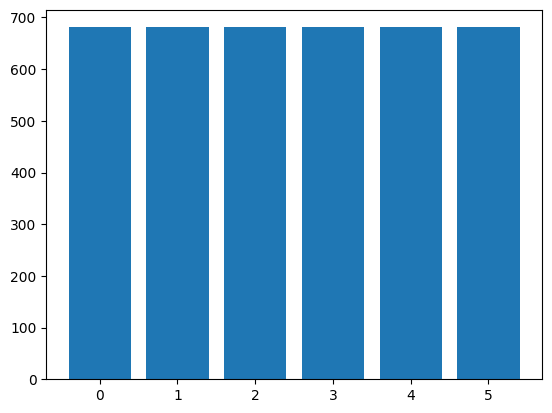

In [9]:
#the data becomes balanced, we just have the class from 3 to 8 available data.
#This data is shown by 0 to 5 (6 classes) in the x-axis, y-axis number of instances

for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [10]:
y.shape

(4086,)

In [11]:
X

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-0.63732878, -1.09646047,  0.29513351, ..., -0.52220727,
         2.48553714, -0.32914411],
       [-0.38671243, -0.75452129,  0.33142207, ..., -0.27755914,
         0.46929526,  0.94299128],
       [ 1.1513147 , -1.26377229,  1.35771701, ..., -1.63623997,
        -0.1115599 ,  0.94546271]])

In [12]:
y

array([2, 2, 2, ..., 5, 5, 5])

In [13]:
import matplotlib.pyplot as plt


In [14]:
#we start the neural network method
#encode to numpy array


from keras.utils import np_utils


encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

print(encoded_Y)

[2 2 2 ... 5 5 5]


In [15]:
#optimizer can be Adam 
#loss function should be categorical_crossentropy
#EarlyStopping callbacks to prevent overfitting

from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [16]:
print(dummy_y)


[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


In [17]:
#Neural network model contain two layers of 10 and 6 neurons
#

model = Sequential()
model.add(Dense(100, input_shape=(X.shape[1],), activation='relu')) # input shape is (features,)
model.add(Dense(50, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(20, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(12, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(6, activation='softmax'))
model.summary()

# compile the model
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', # this is different instead of binary_crossentropy (for regular classification)
              metrics=['accuracy'])

2022-11-16 22:16:47.073640: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-16 22:16:47.073895: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1200      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 20)                1020      
                                                                 
 dense_3 (Dense)             (None, 12)                252       
                                                                 
 dense_4 (Dense)             (None, 6)                 78        
                                                                 
Total params: 7,600
Trainable params: 7,600
Non-trainable params: 0
_________________________________________________________________


In [18]:
#imply learning

import keras
from keras.callbacks import EarlyStopping

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=10, 
                                   restore_best_weights=True) # important - otherwise you just return the last weigths...

# now we just update our model fit call
history = model.fit(X,
                    dummy_y,
                    callbacks=[es],
                    epochs=800000, # you can set this to a big number!
                    batch_size=10,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/800000


2022-11-16 22:16:49.848349: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-16 22:16:50.076015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


327/327 [==============================] - ETA: 0s - loss: 1.2996 - accuracy: 0.4884

2022-11-16 22:16:57.153532: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


327/327 [==============================] - 8s 17ms/step - loss: 1.2996 - accuracy: 0.4884 - val_loss: 3.9352 - val_accuracy: 0.1333
Epoch 2/800000
327/327 [==============================] - 5s 14ms/step - loss: 0.8965 - accuracy: 0.6570 - val_loss: 4.3855 - val_accuracy: 0.1333
Epoch 3/800000
327/327 [==============================] - 5s 14ms/step - loss: 0.7793 - accuracy: 0.6989 - val_loss: 3.8330 - val_accuracy: 0.1369
Epoch 4/800000
327/327 [==============================] - 5s 14ms/step - loss: 0.7152 - accuracy: 0.7124 - val_loss: 3.9606 - val_accuracy: 0.1174
Epoch 5/800000
327/327 [==============================] - 5s 15ms/step - loss: 0.6680 - accuracy: 0.7378 - val_loss: 4.0906 - val_accuracy: 0.1638
Epoch 6/800000
327/327 [==============================] - 5s 14ms/step - loss: 0.6307 - accuracy: 0.7503 - val_loss: 3.7135 - val_accuracy: 0.1528
Epoch 7/800000
327/327 [==============================] - 5s 14ms/step - loss: 0.5987 - accuracy: 0.7632 - val_loss: 3.5767 - val_acc

327/327 [==============================] - 4s 13ms/step - loss: 0.1980 - accuracy: 0.9275 - val_loss: 1.1308 - val_accuracy: 0.5416
Epoch 57/800000
327/327 [==============================] - 4s 13ms/step - loss: 0.1842 - accuracy: 0.9308 - val_loss: 1.2595 - val_accuracy: 0.4425
Epoch 58/800000
327/327 [==============================] - 4s 13ms/step - loss: 0.1845 - accuracy: 0.9351 - val_loss: 0.9525 - val_accuracy: 0.6577
Epoch 59/800000
327/327 [==============================] - 4s 13ms/step - loss: 0.1788 - accuracy: 0.9351 - val_loss: 1.4850 - val_accuracy: 0.4034
Epoch 60/800000
327/327 [==============================] - 4s 13ms/step - loss: 0.1608 - accuracy: 0.9406 - val_loss: 2.7222 - val_accuracy: 0.2604
Epoch 61/800000
327/327 [==============================] - 4s 13ms/step - loss: 0.1818 - accuracy: 0.9400 - val_loss: 1.4654 - val_accuracy: 0.4022
Epoch 62/800000
327/327 [==============================] - 4s 13ms/step - loss: 0.1702 - accuracy: 0.9440 - val_loss: 1.6065 - v

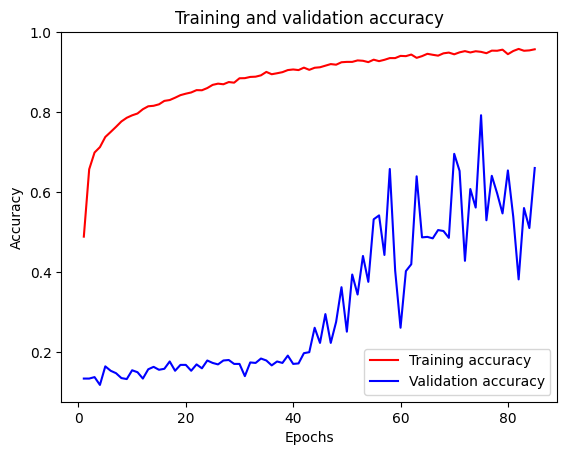

In [19]:
#check the train and test

import matplotlib.pyplot as plt

history_dict = history.history

# learning curve
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "r" is for "solid red line"
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [20]:
#detail info, need to be studied

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

preds = model.predict(X) # see how the model did!
print(preds[0]) # i'm spreading that prediction across three nodes and they sum to 1
print(np.sum(preds[0])) # sum it up! Should be 1
## [9.9999988e-01 1.3509347e-07 6.7064638e-16]
## 1.0

# Almost a perfect prediction
# actual is left, predicted is top
# names can be found by inspecting Y
matrix = confusion_matrix(dummy_y.argmax(axis=1), preds.argmax(axis=1))
matrix
## array([[50,  0,  0],
##        [ 0, 46,  4],
##        [ 0,  1, 49]])


# more detail on how well things were predicted
print(classification_report(dummy_y.argmax(axis=1), preds.argmax(axis=1)))

  1/128 [..............................] - ETA: 33s

2022-11-16 22:23:36.138837: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


128/128 [==============================] - 1s 2ms/step
[8.7100616e-10 1.4508478e-10 9.9999988e-01 6.3157621e-08 1.2502154e-15
 0.0000000e+00]
0.99999994
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       681
           1       0.99      0.99      0.99       681
           2       0.94      0.90      0.92       681
           3       0.77      0.93      0.84       681
           4       0.93      0.96      0.94       681
           5       0.99      0.76      0.86       681

    accuracy                           0.93      4086
   macro avg       0.93      0.93      0.93      4086
weighted avg       0.93      0.93      0.93      4086

